<a href="https://colab.research.google.com/github/Arghaweeb/Self-Drving-Car/blob/main/MNSIT_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
import random

In [44]:
np.random.seed(0)

In [45]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [46]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])

(60000, 28, 28)
(10000, 28, 28)
60000


In [47]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels"
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels"
assert(X_train.shape[1:] == (28,28)), "The dimensions of the image are not 28x28"
assert(X_test.shape[1:] == (28,28)), "The dimensions of the image are not 28x28"

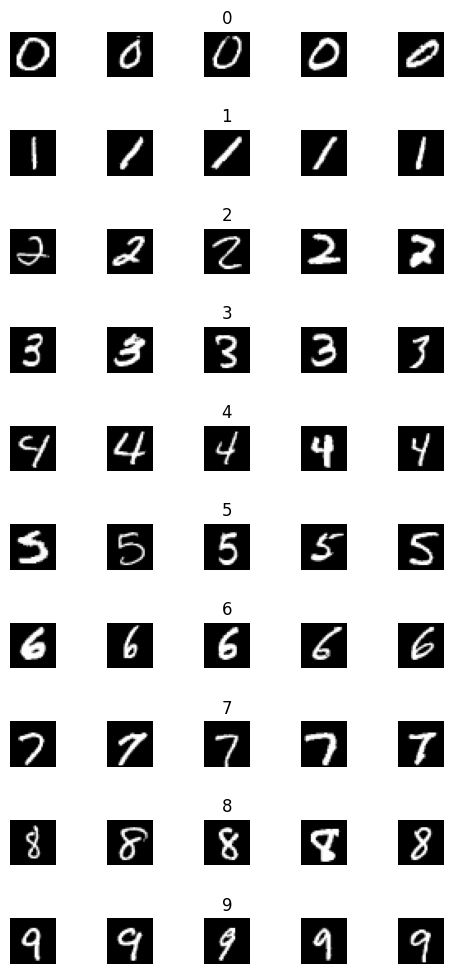

In [48]:
num_of_samples = []
cols = 5
num_classes = 10
fig, axes = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 10))
fig.tight_layout()
for i in range(cols):
  for j in range(num_classes):
    x_selected = X_train[y_train == j]
    axes[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
    axes[j][i].axis("off")
    if i == 2:
      axes[j][i].set_title(str(j))
      num_of_samples.append(len(x_selected))


[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of Images')

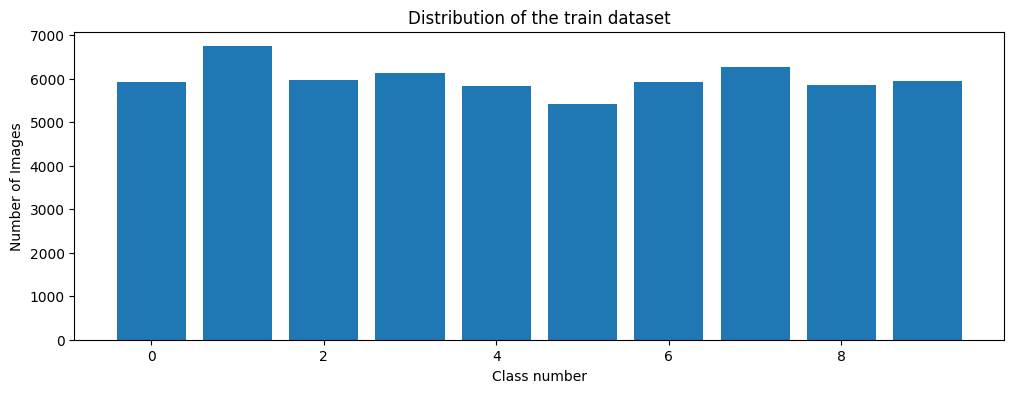

In [49]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of Images")

In [50]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [51]:
X_train = X_train/255
X_test = X_test/255

Reshape the input for matrix multiplication

In [52]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [53]:
def create_model():
  model = Sequential()
  model.add(Dense(10, input_dim=num_pixels, activation='relu'))
  model.add(Dense(10, activation = 'relu'))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model


In [54]:
model = create_model()
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                7850      
                                                                 
 dense_8 (Dense)             (None, 10)                110       
                                                                 
 dense_9 (Dense)             (None, 10)                110       
                                                                 
Total params: 8070 (31.52 KB)
Trainable params: 8070 (31.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [55]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs = 20, batch_size = 200, verbose = 1, shuffle = 1)

Epoch 1/20
270/270 [==============================] - 2s 4ms/step - loss: 0.5387 - accuracy: 0.8346 - val_loss: 0.2770 - val_accuracy: 0.9183
Epoch 2/20
270/270 [==============================] - 1s 3ms/step - loss: 0.3078 - accuracy: 0.9101 - val_loss: 0.2301 - val_accuracy: 0.9315
Epoch 3/20
270/270 [==============================] - 1s 3ms/step - loss: 0.2762 - accuracy: 0.9186 - val_loss: 0.2181 - val_accuracy: 0.9362
Epoch 4/20
270/270 [==============================] - 1s 3ms/step - loss: 0.2639 - accuracy: 0.9226 - val_loss: 0.2050 - val_accuracy: 0.9365
Epoch 5/20
270/270 [==============================] - 1s 3ms/step - loss: 0.2506 - accuracy: 0.9258 - val_loss: 0.2137 - val_accuracy: 0.9372
Epoch 6/20
270/270 [==============================] - 1s 3ms/step - loss: 0.2443 - accuracy: 0.9286 - val_loss: 0.2147 - val_accuracy: 0.9347
Epoch 7/20
270/270 [==============================] - 1s 3ms/step - loss: 0.2409 - accuracy: 0.9283 - val_loss: 0.1986 - val_accuracy: 0.9397
Epoch 

Text(0.5, 0, 'epoch')

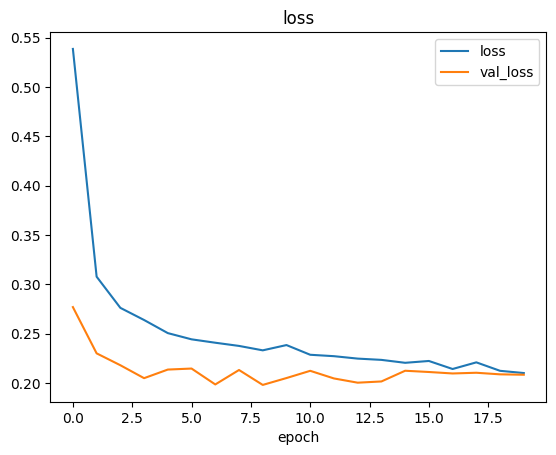

In [56]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

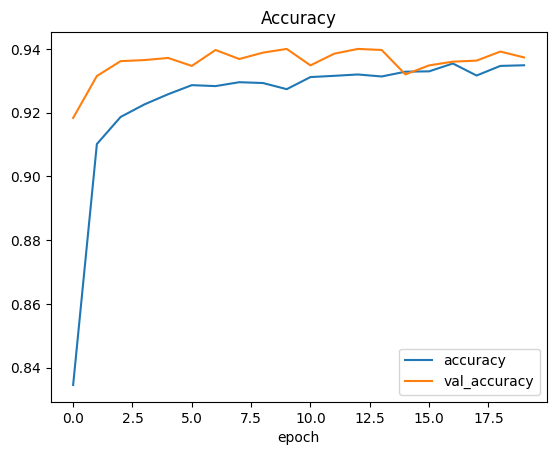

In [57]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [58]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score', score[0])
print('Test accuracy', score[1])

Test score 0.24617399275302887
Test accuracy 0.9279999732971191


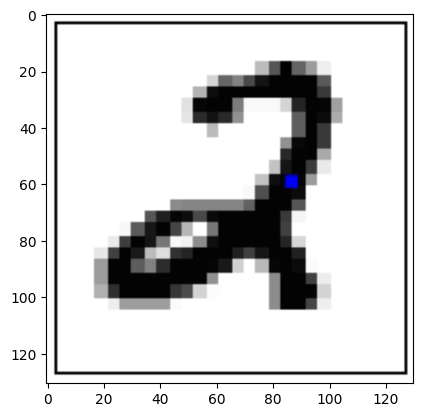

In [62]:
import requests
from PIL import Image  #python imaging library
url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img)


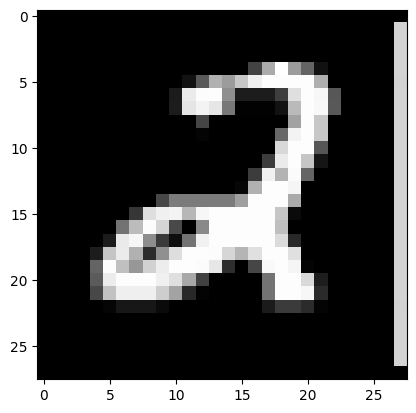

In [68]:
import cv2

img_array = np.asarray(img)
resized = cv2.resize(img_array, (28,28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap=plt.get_cmap("gray"))

In [69]:
image - image/255
image = image.reshape(1, 784)
print(image)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0 210   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0 210   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0 210   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  67 170 254 155 100  17   0   0   0   0   0 210   0   0   0   0
    0   0   0   0   0   0   0  18  89 176 155 198 239 252 252 252 252 174
    0   0   0   0   0 209   0   0   0   0   0   0   0   0   0   0  27 234
  251 252 142  28  28  28  62 222 252 246  87   0   0   0   0 210   0   0
    0   0   0   0   0   0   0   0  28 228 243 229 119   2   2   2  18 185
  252 247  88   0   0   0   0 210   0   0   0   0   0   0   0   0   0   0
    0   0  69   0   0   0   0   0   0 

In [71]:
pred_prob = model.predict(image)
pred_classes = np.argmax(pred_prob, axis=-1)
print("Predicted digit", str(pred_classes))

1/1 [==============================] - 0s 143ms/step
Predicted digit [2]
